# Malicious URL detection using MLP<br>


In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 98FA-EFFA

 Directory of c:\Users\katar\OneDrive\Desktop\Project

22-04-2024  07:35    <DIR>          .
11-05-2024  17:56    <DIR>          ..
22-04-2024  07:35               933 app.py
04-04-2024  14:38    <DIR>          Data
04-04-2024  14:59    <DIR>          graphs
12-05-2024  20:06           350,908 malicious-url-detection-using-mlp.ipynb
22-04-2024  07:35            43,672 model.h5
22-04-2024  07:33                 0 model.pkl
12-05-2024  20:05            39,564 url.keras
               5 File(s)        435,077 bytes
               4 Dir(s)  325,695,496,192 bytes free


In [3]:
urldata = pd.read_csv("Data/urldata.csv")

In [4]:
import numpy as np
import pandas as pd
num_rows = urldata.shape[0]
print("Number of rows in the dataset:", num_rows)


Number of rows in the dataset: 450176


In [5]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [6]:
urldata = urldata.drop('Unnamed: 0',axis=1)

In [7]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [8]:
urldata.shape

(450176, 3)

In [9]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


Checking Missing Values


In [10]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

# 1. DATA PREPROCESSING


The following features will be extracted from the URL for classification. <br>

<ol>
    <li>Length Features
    <ul>
        <li>Length Of Url</li>
        <li>Length of Hostname</li>
        <li>Length Of Path</li>
        <li>Length Of First Directory</li>
        <li>Length Of Top Level Domain</li>
    </ul>
    </li>
    <br>
   <li>Count Features
    <ul>
    <li>Count Of  '-'</li>
    <li>Count Of '@'</li>
    <li>Count Of '?'</li>
    <li>Count Of '%'</li>
    <li>Count Of '.'</li>
    <li>Count Of '='</li>
    <li>Count Of 'http'</li>
    <li>Count Of 'www'</li>
    <li>Count Of Digits</li>
    <li>Count Of Letters</li>
    <li>Count Of Number Of Directories</li>
    </ul>
    </li>
    <br>
    <li>Binary Features
    <ul>
        <li>Use of IP or not</li>
        <li>Use of Shortening URL or not</li>
    </ul>
    </li>
    
</ol>


### 1.1 Length Features


In [11]:

from urllib.parse import urlparse
import os.path

In [12]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [13]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [14]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [15]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [16]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,0,22,14,0,0
1,https://www.youtube.com,benign,0,23,15,0,0
2,https://www.facebook.com,benign,0,24,16,0,0
3,https://www.baidu.com,benign,0,21,13,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0


Dataset after extracting length features


### 1.2 Count Features


In [17]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [18]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [19]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [20]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [21]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [22]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [23]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [24]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [25]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [26]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [27]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [28]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features


In [29]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0


### 1.3 Binary Features


In [30]:
import re

In [31]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [32]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features


In [33]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


# 2. Data Visualization


Text(0, 0.5, 'Number Of URLs')

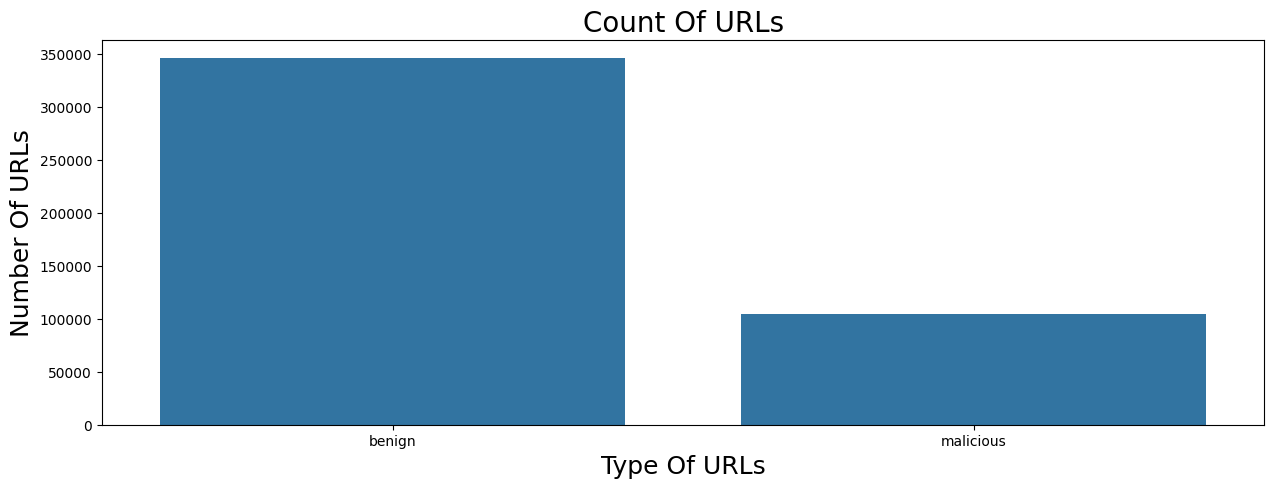

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [35]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


The data shows a class imbalance to some extent.


(0.0, 1000.0)

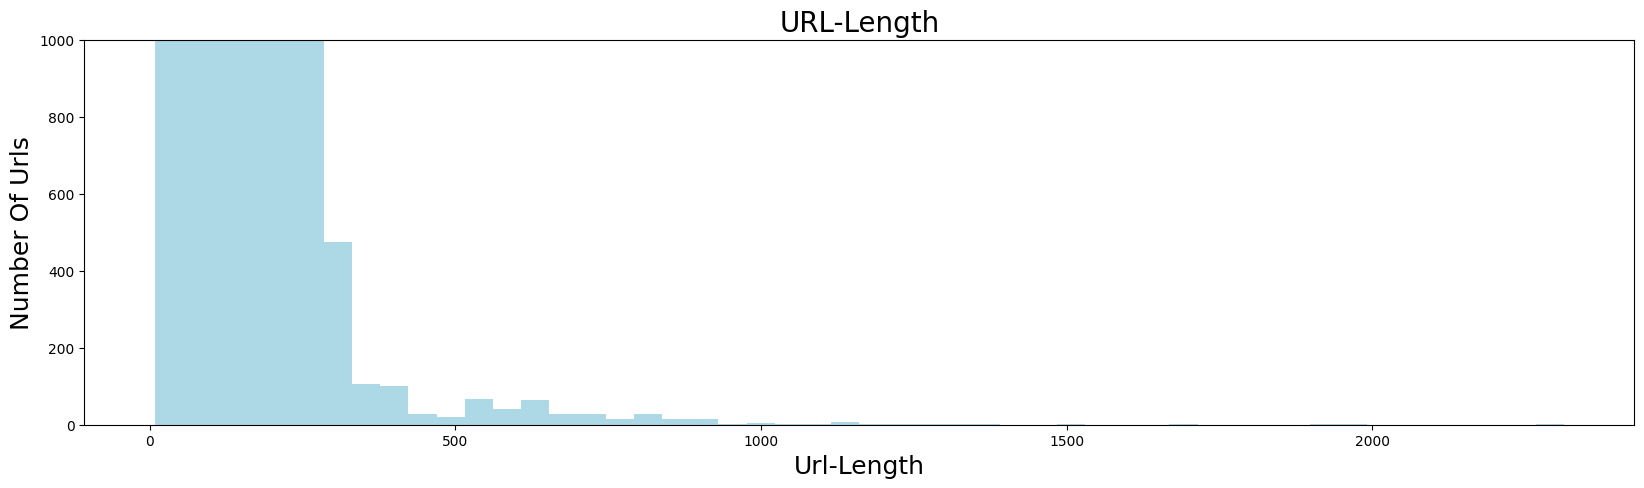

In [36]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

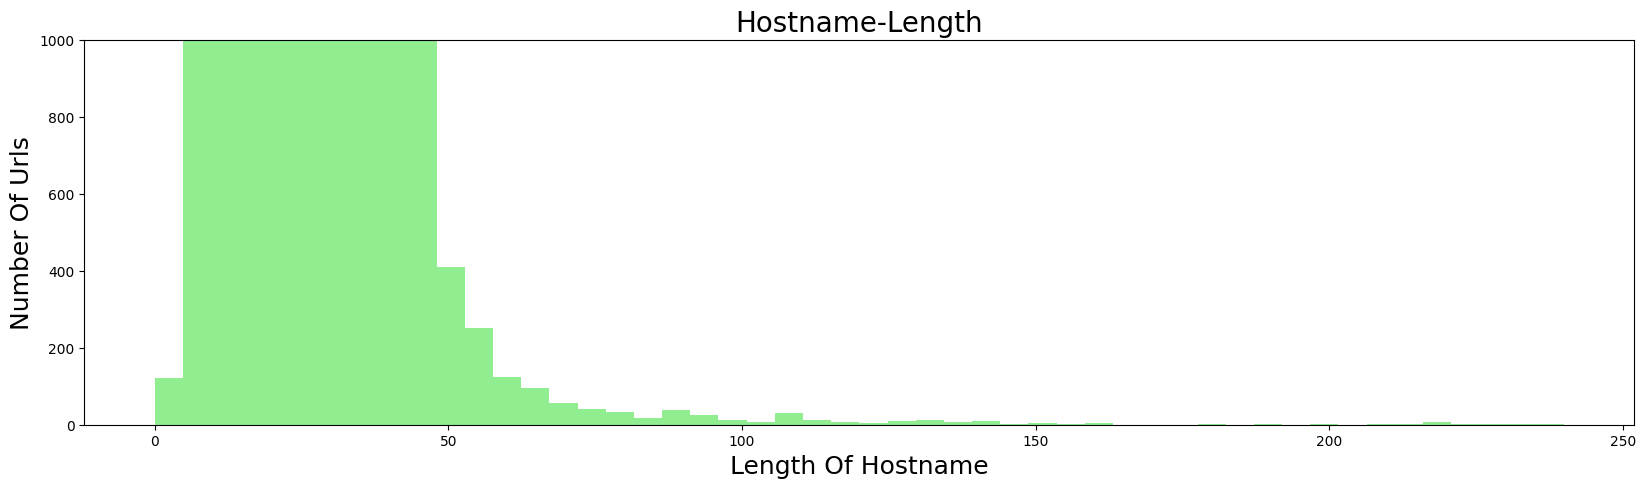

In [37]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

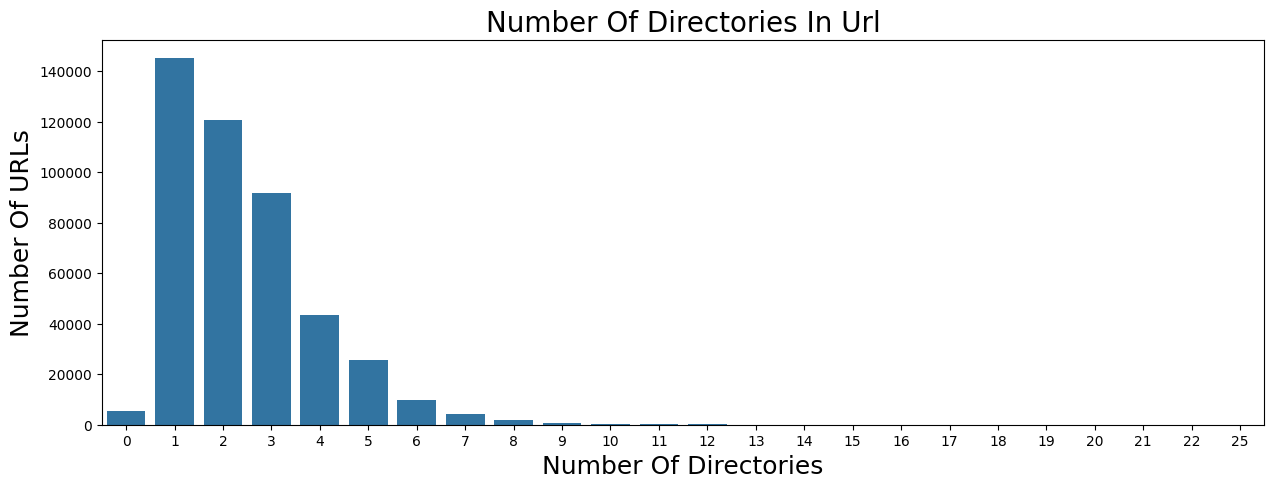

In [38]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

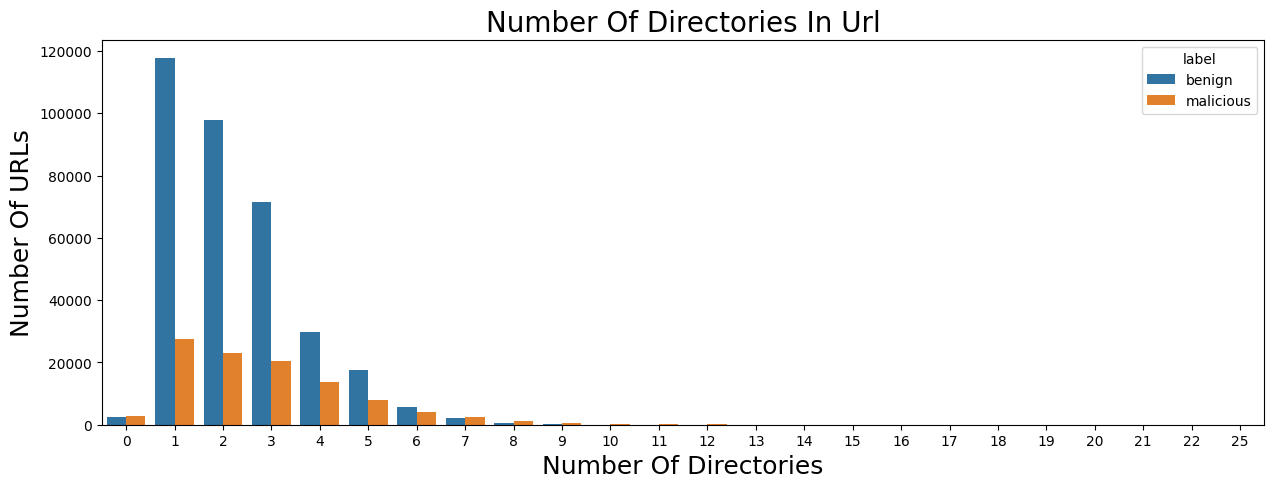

In [39]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

# 3. Building Models Using Lexical Features Only


In [40]:
#from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score




In [41]:
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

## 3.1 Train test split


In [42]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit and resample the data
x_sample, y_sample = smote.fit_resample(x, y.values.ravel())

# Convert the sampled data back to DataFrames
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# Check the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)


Size of x-sample : (691476, 16)
Size of y-sample : (691476, 1)


In [43]:
#Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [45]:
x_train.shape

(553180, 16)

In [46]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu')) 

model.add(Dense(1, activation='sigmoid')) 
model.summary()

c:\Users\katar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [48]:
pwd

'c:\\Users\\katar\\OneDrive\\Desktop\\Project'

In [49]:
import os

# Define the original filepath
original_filepath = './url.keras'

# Define the new filepath with the .keras extension
new_filepath = './url.keras'

# Rename the file
os.rename(original_filepath, new_filepath)


In [50]:
checkpointer = ModelCheckpoint(filepath='./url.keras', monitor='val_acc', mode='max', verbose=2, save_best_only=True)


In [51]:

history=model.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpointer])

Epoch 1/5
2148/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6855 - loss: 0.5577
Epoch 1: val_acc improved from -inf to 0.97318, saving model to ./url.keras
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - acc: 0.6864 - loss: 0.5567 - val_acc: 0.9732 - val_loss: 0.1231
Epoch 2/5
2152/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9845 - loss: 0.0860
Epoch 2: val_acc improved from 0.97318 to 0.99441, saving model to ./url.keras
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.9845 - loss: 0.0859 - val_acc: 0.9944 - val_loss: 0.0376
Epoch 3/5
2141/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9951 - loss: 0.0324
Epoch 3: val_acc improved from 0.99441 to 0.99599, saving model to ./url.keras
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9951 - loss: 0.0324 - val_acc: 0.9960 - val_loss: 0.0235
Epoch 4/5
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9959 - loss: 0.0223
Epoch 4: val_acc improved from 0.99599 to 0.99608, saving model to ./url.keras
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 

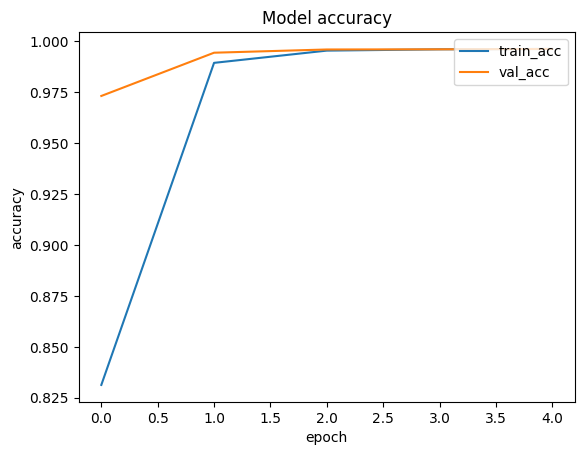

In [52]:
# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In [53]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Loss:", loss*100)
print("Test Accuracy:",acc*100)

4322/4322 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.9961 - loss: 0.0194
Test Loss: 1.867406815290451
Test Accuracy: 99.62471723556519


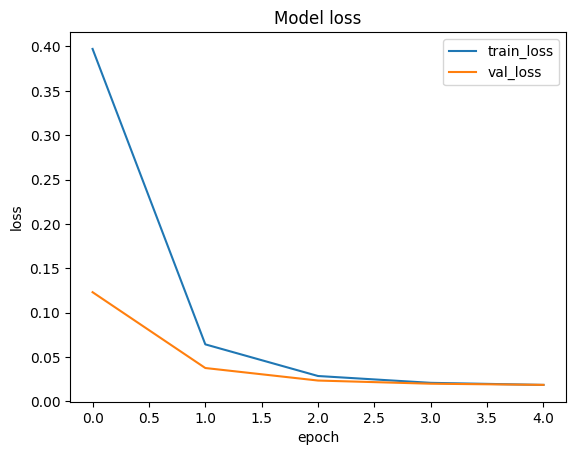

In [54]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [55]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

4322/4322 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Predict probabilities for each class for test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)  # For binary classification

# Alternatively, for multi-class classification, you can use argmax
# y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)


4322/4322 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Precision: 99.68820370691148
Recall: 99.5631676830587
F1-score: 99.62564646311644


In [57]:
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

In [58]:
view_result(pred_test[:10])

Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
